In [41]:
import sys
import pandas as pd
import string
import numpy as np
from scipy import stats
import os
from multiprocessing import Pool
from os.path import splitext,basename,exists

data_xls_fh='../test/test.xlsx'
info=pd.read_excel(data_xls_fh,'info')
info=info.set_index('varname')
for var in info.iterrows():
    val=info['input'][var[0]]
    #print var[0]
    if not pd.isnull(val):
        exec("%s=info['input']['%s']" % (var[0],var[0]))
    else:
        exec("%s=info['default']['%s']" % (var[0],var[0]))

data_job=pd.read_excel(data_xls_fh,'JobView')
data_job_del_cols=[str(s) for s in data_job.columns if 'Intensity' in str(s) ]
for col in data_job_del_cols:
    exec("del data_job['%s']" % col,locals(), globals())

nd_fns =[str(s) for s in data_job['File Name'].tolist()]
frameis=[int(s) for s in data_job['File Frame Index'].tolist()]

csv_fhs =[]
nums_fhs=[]
nd_fn_framei_tps=[]
for i in range(len(nd_fns)):
    csv_fhs.append("%s/%s%02d.csv" % (nd_dh,nd_fns[i],frameis[i]))
    nums_fhs.append("%s/%s%02d.csv.nums" % (nd_dh,nd_fns[i],frameis[i]))
    nd_fn_framei_tps.append([nd_fns[i],frameis[i]])

    #       csv2nums(nd_fns_frameis_tps[0])


In [46]:
def csv2nums(csv_fh):
    nums_fh=csv_fh+".nums"    
    if exists(csv_fh):# and (not exists(nums_fh)) :
        print ">>> STATUS  : processing : %s" % csv_fh 
        arr=np.genfromtxt(csv_fh,delimiter=',')
        vec=np.concatenate(arr)
        nums=pd.DataFrame()
        
        nums.loc[0,'mode']=stats.mode(vec)[0][0]
        nums.loc[0,'mean']=np.mean(vec)
        nums.loc[0,'median']=np.median(vec)
        # vec = vec
        # vec = vec[~np.isnan(vec)]
        # vec = vec[~np.isinf(vec)]
        try:
            argsGumbel0 = gumbel_r.fit(vec)
            bins = np.arange(0, 5000, 50)#np.arange(5000)
            probs, binedges = np.histogram(vec, bins=bins, normed=True)
            bincenters = 0.5*(binedges[1:]+binedges[:-1])
            argsGumbel1 = curve_fit(gumbel_r.pdf, bincenters, probs, p0=argsGumbel0)[0]
            nums.loc[0,'peak']=argsGumbel1[0]
        except:
            nums.loc[0,'peak']=np.nan
        
        # Thresholding
        dw_threshold=2000
        up_threshold=5000
        vec = vec[vec>dw_threshold]
        vec = vec[vec<up_threshold]

        nums.loc[0,'mode_thr']=stats.mode(vec)[0][0]
        nums.loc[0,'mean_thr']=np.mean(vec)
        nums.loc[0,'median_thr']=np.median(vec)
        # vec = vec
        # vec = vec[~np.isnan(vec)]
        # vec = vec[~np.isinf(vec)]
        try:
            argsGumbel0 = gumbel_r.fit(vec)
            bins = np.arange(0, 5000, 50)#np.arange(5000)
            probs, binedges = np.histogram(vec, bins=bins, normed=True)
            bincenters = 0.5*(binedges[1:]+binedges[:-1])
            argsGumbel1 = curve_fit(gumbel_r.pdf, bincenters, probs, p0=argsGumbel0)[0]
            nums.loc[0,'peak_thr']=argsGumbel1[0]
        except:
            nums.loc[0,'peak_thr']=np.nan
        
        nums.to_csv(nums_fh)
    else:
        print ">>> WARNING   : skipping : %s" % csv_fh


2522.57406892


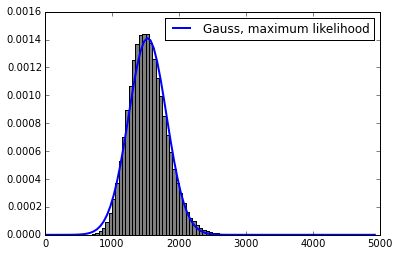

In [69]:
csv_fh=csv_fhs[1000]
arr=np.genfromtxt(csv_fh,delimiter=',')
vec=np.concatenate(arr)
nums=pd.DataFrame()
nums.loc[0,'mode']=stats.mode(vec)[0][0]
nums.loc[0,'mean']=np.mean(vec)
nums.loc[0,'median']=np.median(vec)

from scipy.optimize import curve_fit
from scipy.stats import norm #gumbel_r
import matplotlib.pyplot as plt
%matplotlib inline
# # amps = np.loadtxt("pyr_11.txt")*-1000 # http://pastebin.com/raw.php?i=uPK31JGE
# amps = vec
# # amps = amps[~np.isnan(amps)]
# # amps = amps[~np.isinf(amps)]
# argsGumbel0 = gumbel_r.fit(amps)
# # argsGauss0 = norm.fit(amps)
# bins = np.arange(0, 5000, 50)#np.arange(5000)
# probs, binedges = np.histogram(amps, bins=bins, normed=True)
# bincenters = 0.5*(binedges[1:]+binedges[:-1])
# argsGumbel1 = curve_fit(gumbel_r.pdf, bincenters, probs, p0=argsGumbel0)[0]
# # argsGauss1 = curve_fit(norm.pdf, bincenters, probs, p0=argsGauss0)[0]
try:
    bins = np.arange(0, 5000, 50)#np.arange(5000)
    probs, binedges = np.histogram(vec, bins=bins, normed=True)
    bincenters = 0.5*(binedges[1:]+binedges[:-1])
#     argsGumbel0 = gumbel_r.fit(vec)
#     argsGumbel1 = curve_fit(gumbel_r.pdf, bincenters, probs, p0=argsGumbel0)[0]
    # nums.loc[0,'peak']=argsGumbel1[0]
    # print argsGumbel1[0]
    argsGauss0 = norm.fit(amps)
    argsGauss1 = curve_fit(norm.pdf, bincenters, probs, p0=argsGauss0)[0]
    print argsGauss1[0]
    
    plt.figure()
    plt.hist(amps, bins=bins, normed=True, color='0.5')
    xes = bincenters#np.arange(0, 5000, 50)
#     plt.plot(xes, gumbel_r.pdf(xes, *argsGumbel0), linewidth=2, label='Gumbel, maximum likelihood')
#     plt.plot(xes, gumbel_r.pdf(xes, *argsGumbel1), linewidth=2, label='Gumbel, least squares')
    plt.plot(xes, norm.pdf(xes, *argsGauss0), linewidth=2, label='Gauss, maximum likelihood')
#     plt.plot(xes, norm.pdf(xes, *argsGauss1), linewidth=2, label='Gauss, least squares')
    plt.legend(loc='upper right')
    plt.show()
except:
    print "n"

1434.7421100980446

In [50]:
csv2nums('/media/Transcend/20160219_000356_267/WellA01_WellA01_Seq0344.nd200.csv')

>>> STATUS  : processing : /media/Transcend/20160219_000356_267/WellA01_WellA01_Seq0344.nd200.csv


In [2]:
    data_job.set_index(['File Name', 'File Frame Index'], inplace=True)
    for i in range(len(nums_fhs)):  
        nums_fh=nums_fhs[i]
        nums_df=pd.read_csv(nums_fh)
        nd_fn=nd_fn_framei_tps[i][0]
        framei=nd_fn_framei_tps[i][1]
        data_job.loc[(nd_fn,framei),'mean']  =nums_df.loc[0,'mean']
        data_job.loc[(nd_fn,framei),'mode']  =nums_df.loc[0,'mode']
        data_job.loc[(nd_fn,framei),'median']=nums_df.loc[0,'median']
        data_job.loc[(nd_fn,framei),'peak']=nums_df.loc[0,'peak']
        data_job.loc[(nd_fn,framei),'mean_thr']  =nums_df.loc[0,'mean_thr']
        data_job.loc[(nd_fn,framei),'mode_thr']  =nums_df.loc[0,'mode_thr']
        data_job.loc[(nd_fn,framei),'median_thr']=nums_df.loc[0,'median_thr']
        data_job.loc[(nd_fn,framei),'peak_thr']=nums_df.loc[0,'peak_thr']

    data_job=data_job.reset_index()
    data_job.to_csv(data_xls_fh+".nums")      